<a href="https://colab.research.google.com/github/matt-balda/pln-2023/blob/master/exercicios/curve_zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import re
from operator import itemgetter
import pandas as pd
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


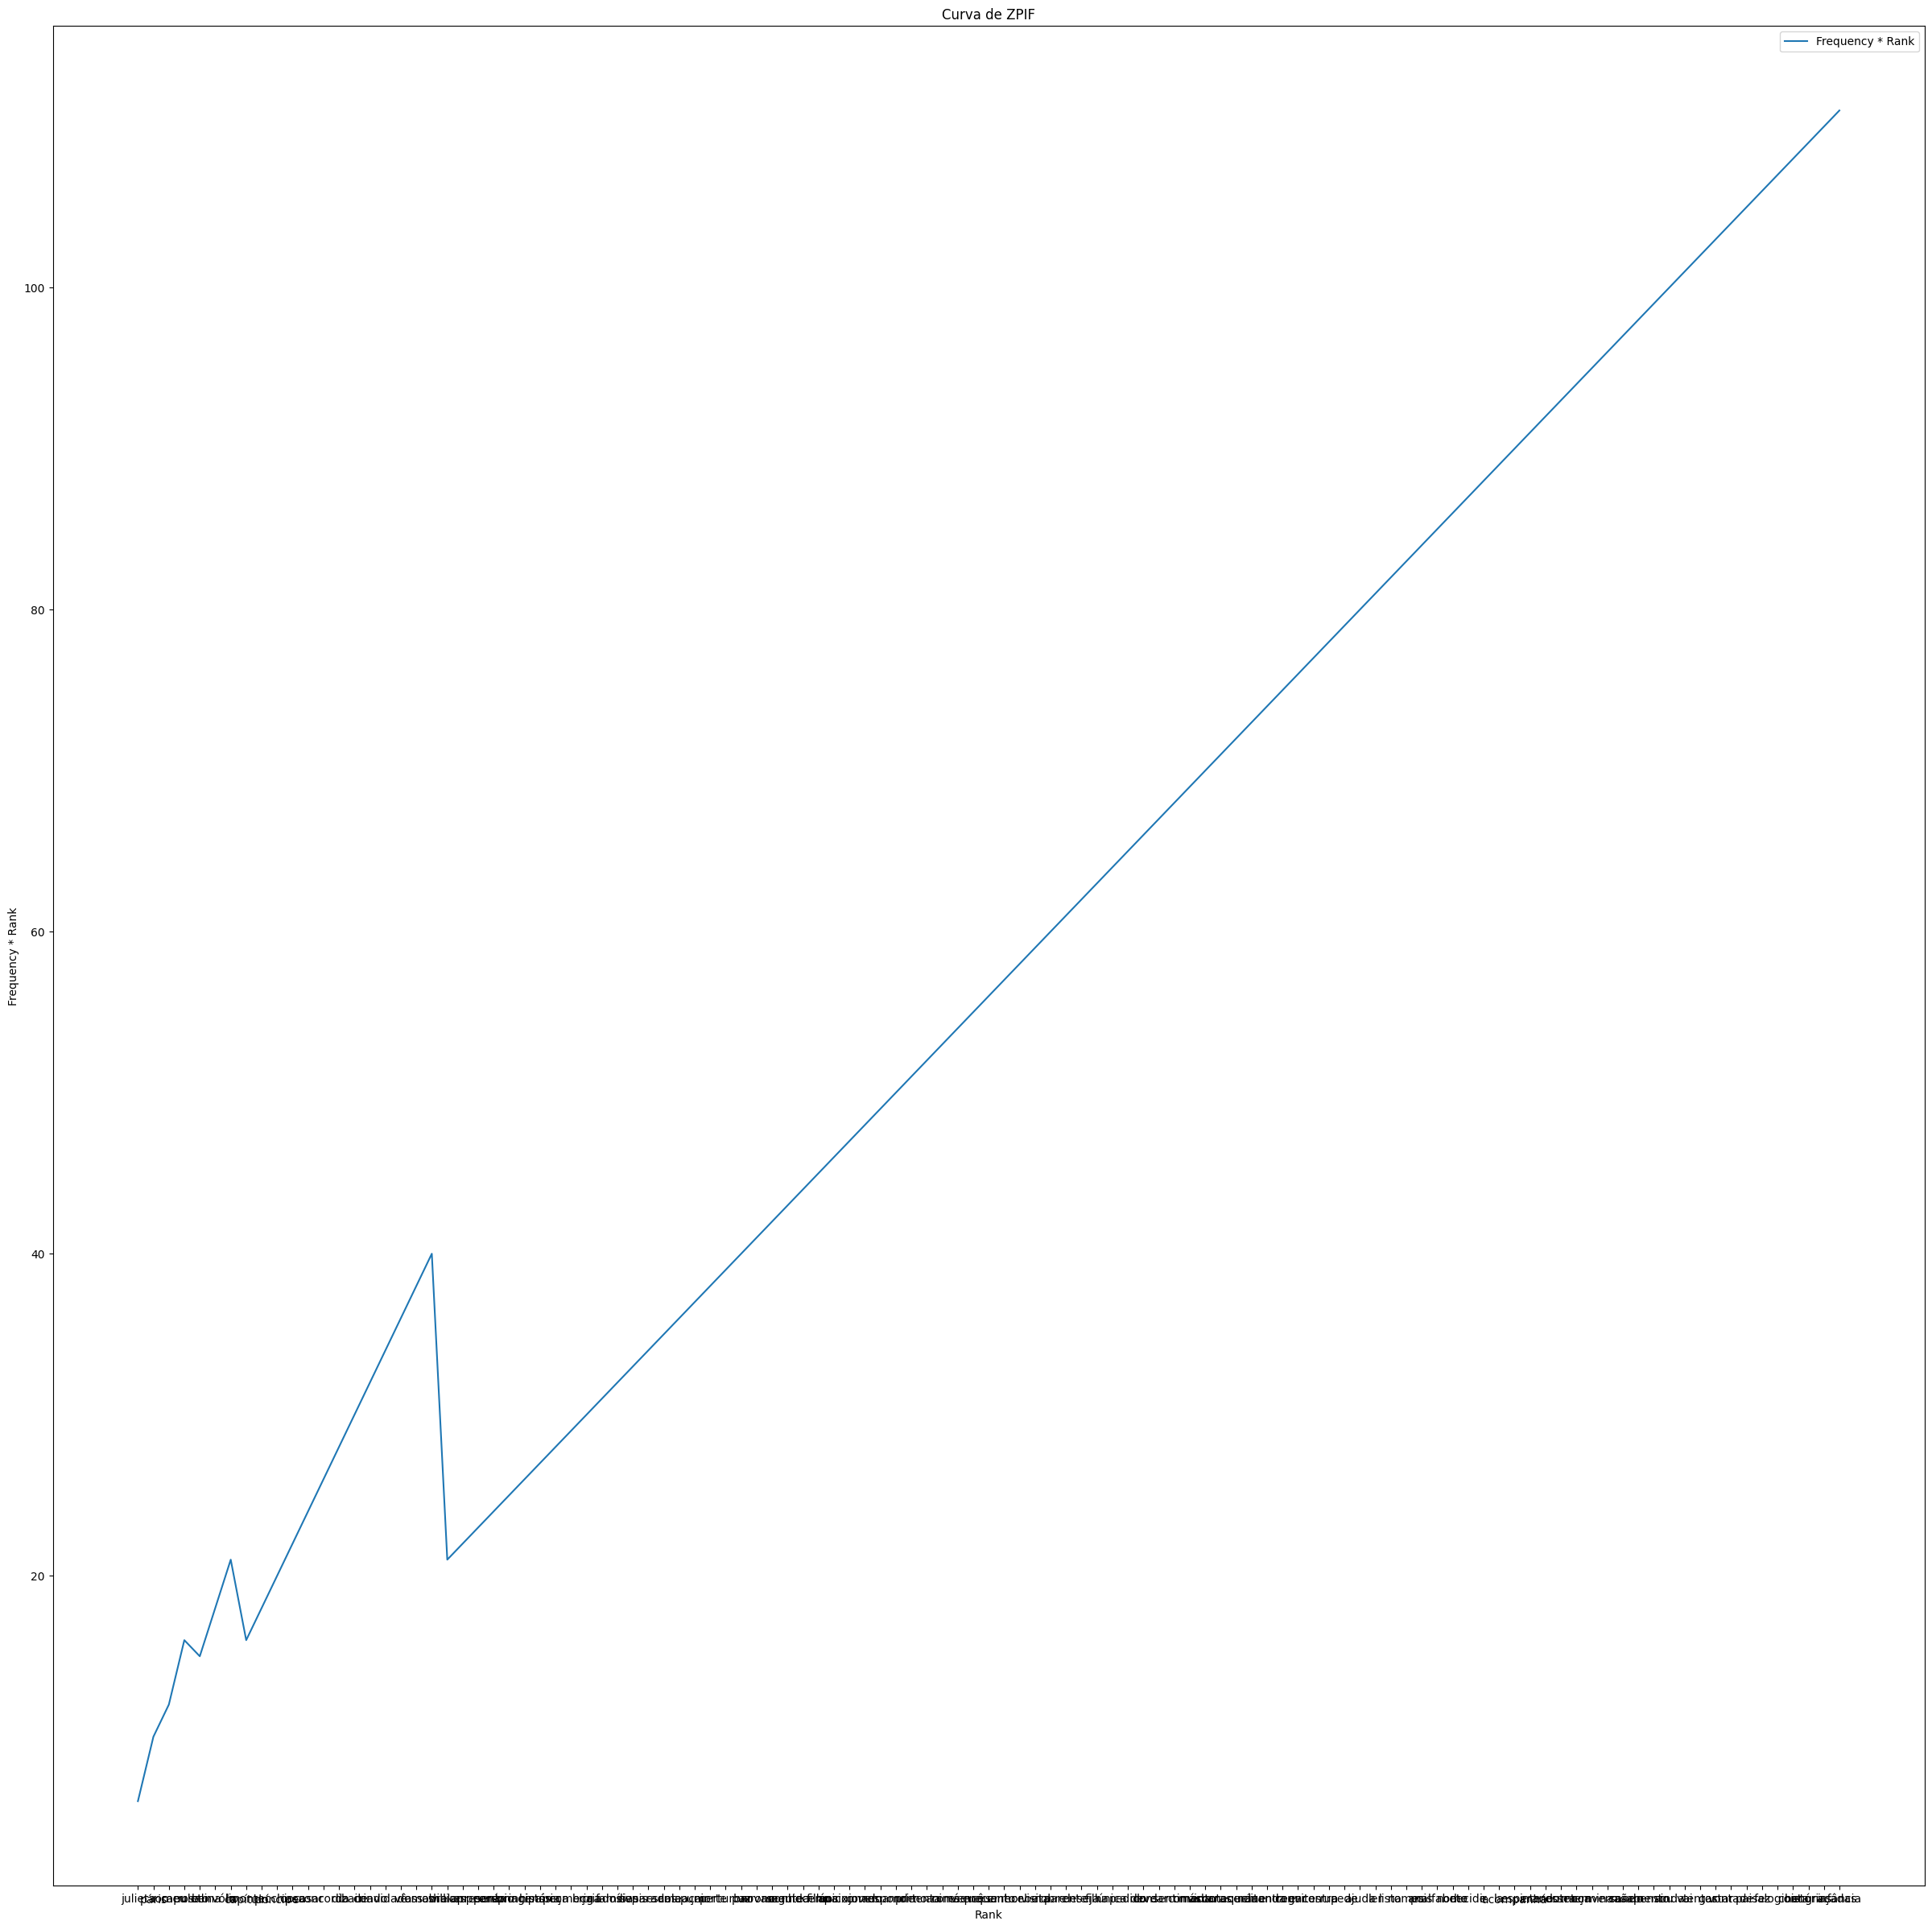

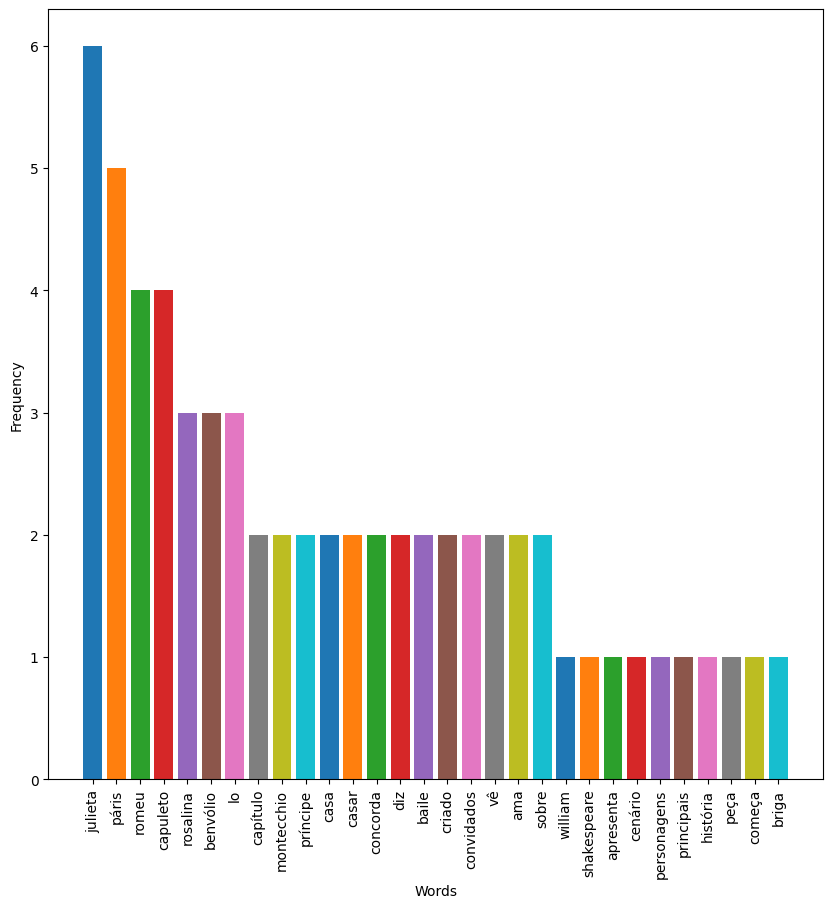

In [49]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

text = "O capítulo 1 de Romeu e Julieta, de William Shakespeare, apresenta o cenário e os personagens principais da história. A peça começa com uma briga entre os criados das famílias rivais Montecchio e Capuleto, que são separados pelo príncipe Escala, que ameaça punir com a morte quem perturbar a paz de Verona novamente. Em seguida, conhecemos Romeu, o filho único dos Montecchio, que está apaixonado por Rosalina, uma jovem que não corresponde ao seu amor. Seu primo Benvólio tenta animá-lo e convencê-lo a esquecer Rosalina. Enquanto isso, na casa dos Capuleto, o senhor Capuleto recebe a visita de Páris, um nobre parente do príncipe, que deseja se casar com sua filha única, Julieta. Capuleto concorda com o pedido, mas diz que Julieta deve dar seu consentimento também. Ele convida Páris para um baile de máscaras que acontecerá naquela noite em sua casa, e manda um criado entregar os convites aos convidados. O criado encontra Romeu e Benvólio na rua e pede ajuda para ler a lista de nomes, pois ele é analfabeto. Romeu vê o nome de Rosalina entre os convidados e decide ir ao baile para vê-la. Benvólio concorda em acompanhá-lo, esperando que ele se interesse por outra moça. O capítulo termina com Julieta conversando com sua mãe e sua ama sobre o casamento com Páris. Julieta diz que não pensou em se casar ainda, mas que vai tentar gostar de Páris se for essa a vontade de seus pais. Sua ama faz elogios a Páris e conta histórias engraçadas sobre a infância de Julieta."
tokenizer = re.findall(r'\b\w+\b', text)

frequency = {}
words_doc = nltk.Text(tokenizer)
stopwords = stopwords.words('portuguese')

words_doc = [word.lower() for word in words_doc if word.isalpha()]
words_doc = [word for word in words_doc if word not in stopwords]

for word in words_doc:
    count = frequency.get(word, 0)
    frequency[word] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

plt.figure(figsize=(30, 30))
plt.plot(df['Frequency * Rank'], label='Frequency * Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency * Rank')
plt.title('Curva de ZPIF')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)

for word , freq in collection[:30]:
    plt.bar(word, freq)
plt.show()
